## <center> Unidad 2 <center>
   
   ### <center> Mauricio Suárez Durán<br>Clase 1 <br><br><br> Algorítmo de Euler <center>
    
   #### <center> Departamento de Física y Geología <br> Universidad de Pamplona <br> I Semestre, 2019 <center>
   
   <center>
   <img src="../pictures/escudounipamplona.png" alt="drawing" width="100"/>
   <center>

### Consiste en encontrar la imagen de $x_n$ a partir de la ecuación de la recta que pasa por el punto inicial $(x_0, y_0)$:
- $y'(x_n) = y_n = y_{n-1} + \Delta x*y(x_{n-1}, y_{n-1})$

### Error por redondeo
<br><br> 
\begin{equation}
    \frac{x^2 - 1/9}{x-1/3} = x + \frac{1}{3}
\end{equation}
<br><br>
- Usando $x = 0.3334$, $1/9 \sim 0.1111$ y $1/3 \sim 0.3333$

In [1]:
x = 0.3334
_9 = 0.1111
_3 = 0.3333

print( 'For x*x: %0.4f\n' % ((x*x - _9)/(x - _3)) )

x2 = x*x
print("x*x =", x2)
x2 = 0.1112

print( '\nFor x2: %0.4f\n' % ((x2 - _9)/(x - _3)) )

print( 'For analitic: %0.4f\n' % (x + _3) )

For x*x: 0.5556

x*x = 0.11115555999999999

For x2: 1.0000

For analitic: 0.6667



### Error por truncamiento
- Están dados por la cota superior: 
\begin{equation}
    y^{k+1}(c)\frac{(x-a)^{k+1}}{(k+1)!}
\end{equation}
<br><br>
- Para el caso del sistema masa resorte:
\begin{equation}
    y''(c)\frac{h^2}{2!}
\end{equation}
<br><br>
\begin{equation}
    \ddot{x}(t) = -A\omega^2\sin(\omega t )
\end{equation}

In [2]:
from pylab import plot, show, grid, xlabel, ylabel, legend, xlim, ylim, gcf, clf, gca, cla
from numpy import sin, sqrt, arange
from numpy import pi as PI

k = 1. # kg / s^-2
m = 1. # kg
l = 1. # m
k_m = k/m

x0 = l
v0 = 0.

v = [] # Velocity vector
x = [] # Displacement vector
x_t = [] # Vector for real solution
dt = 0.1 # Step length
Tt = 10. # Total time / s
ns = int(Tt // dt + 1) # number of steps

t = [ i*dt for i in range(ns) ] # Time vector

In [3]:
v.append( v0 )
x.append( x0 )

x_t.append(l*sin(k_m*0 + PI/2.))

for i in range(1, len(t)):
    v0 = v0 - k_m*x0*dt # v(t+dt)
    v.append( v0 )
    x0 = x0 + v[i-1]*dt # x(t+dt)
    x.append( x0 )
    x_t.append( l*sin(k_m*t[i] + PI/2.) )

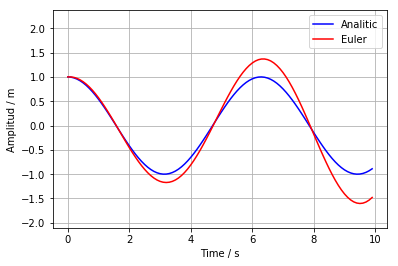

In [4]:
plot(t, x_t, 'b-', label="Analitic")
plot(t, x, 'r-', label="Euler")
legend()

ylabel("Amplitud / m")
xlabel("Time / s")
grid("on")
ylim(min(x)-0.5,max(x)+1.)
show()

### Hacer un gráfico que muestre la diferencia relativa (%) entre los dos métodos.
- Compare con el error por truncamiento hasta 10 s, para dt = 0.1 s y dt = 0.05 s

# Algorítmo de Euler mejorado
<br><br>
\begin{equation}
    y_{n+1} = y_n + h\frac{f(x_n,y_n) + f(x_{n+1},y^*_{n+1})}{2}
\end{equation}
<br><br>
donde
\begin{equation}
    y^*_{n+1} = y_n + h*f(x_n, y_n)
\end{equation}

In [5]:
x0 = l # Restart initial position
v0 = 0 # Restart initial velocity

vm = [] # Velocity vector 
xm = [] # Displacement vector
xcr = [] # Displacemnt vector for Euler-Cromer

vm.append( v0 )
xm.append( x0 )
xcr.append( x0 )

In [6]:
for i in range(1, len(t)):
    v0 = v0 - dt*k_m*x0 # v(t+dt)    
    vm.append( v0 )
    xcr.append( x0 + dt*v0 )
    x0 = x0 + 0.5*dt*( vm[i-1] + v0 )
    xm.append( x0 )

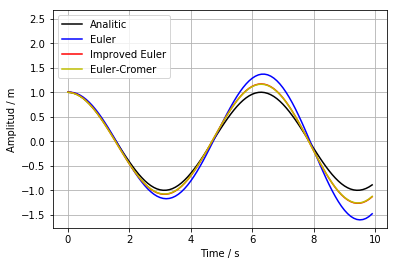

-1.2644936764304757 1.1697858941230317


In [7]:
plot(t, x_t, 'k-', label="Analitic")
plot(t, x, 'b-', label="Euler")
plot(t, xm, 'r-', label="Improved Euler")
plot(t, xcr, 'y-', label="Euler-Cromer")

legend()

ylabel("Amplitud / m")
xlabel("Time / s")
grid("on")
ylim(min(xm)-0.5,max(xm)+1.5)
show()
print(min(xm), max(xm))

### Hacer un gráfico que muestre la diferencia relativa (%) entre los tres métodos.

### Gráfique la velocidad en función del tiempo

### Gráfique la energía cinética, potencia y total del sistema, se conserva?

### Un poco de movimiento al asunto

KeyboardInterrupt: 

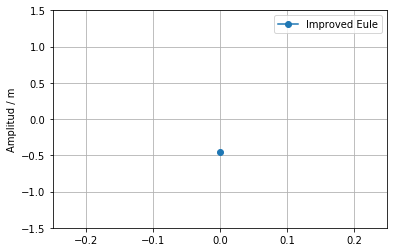

In [8]:
from IPython import display
import time
import matplotlib.pyplot as plt

timerange = arange(dt, Tt, dt)

x0 = l # Restart initial position
v0 = 0 # Restart initial velocity

vm = [] # Velocity vector 
xm = [] # Displacement vector
xcr = [] # Displacemnt vector for Euler-Cromer

vm.append( v0 )
xm.append( x0 )
xcr.append( x0 )

for i in range(1, len(t)):
    
    v0 = v0 - dt*k_m*x0 # v(t+dt)
    vm.append( v0 )
    xcr.append( x0 + dt*v0 )
    x0 = x0 + 0.5*dt*( vm[i-1] + v0 )
    xm.append( x0 )    
    
    plt.gca().cla()
    plt.plot(0, xm[i], 'o-', label="Improved Eule")
    plt.legend()

    plt.ylabel("Amplitud / m")
    #plt.xlabel("Time / s")
    plt.grid("on")
    #plt.ylim(min(xm)-0.5,max(xm)+1.5)
    plt.axis([-0.25,0.25,-1.5,1.5])
    #show()
    
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.05)
    